In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#MNIST CSV FOR TRAINING & TESTING 
train_data = pd.read_csv('')
test_data = pd.read_csv('')

In [4]:
#DATA FOR TRAIN 
train_data = np.array(train_data)
mTrain,nTrain = train_data.shape
np.random.shuffle(train_data)
train_data = train_data.T
Y_trainD = train_data[0]
X_trainD = train_data[1:nTrain]
X_trainD = X_trainD / 255

#DATA FOR TEST 
test_data = np.array(test_data)
mTest,nTest = test_data.shape
np.random.shuffle(test_data)
test_data = test_data.T
Y_testD = test_data[0]
X_testD = test_data[0:nTest]
X_testD = X_testD / 255

In [5]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softMax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+ b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softMax(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return Z > 0 

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / mTrain * dZ2.dot(A1.T)
    db2 = 1 / mTrain * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / mTrain * dZ2.dot(X.T)
    db1 = 1 / mTrain * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2
    

    
    

In [14]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X,Y,alpha,iterations):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1 ,A1 ,Z2 , A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2 ,dW1,db1,dW2,db2,alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

    return W1,b1,W2,b2

In [18]:
W1 ,b1,W2,b2 = gradient_descent(X_trainD,Y_trainD,1,500)

Iteration:  0
[8 0 9 ... 8 4 9] [4 5 5 ... 9 2 8]
Accuracy:  0.11369047619047619
Iteration:  50
[9 5 8 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.804952380952381
Iteration:  100
[9 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.8825
Iteration:  150
[9 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.8925952380952381
Iteration:  200
[4 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.8897619047619048
Iteration:  250
[9 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.9040952380952381
Iteration:  300
[4 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.9059285714285714
Iteration:  350
[4 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.9076666666666666
Iteration:  400
[4 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.9083333333333333
Iteration:  450
[4 5 5 ... 9 2 8] [4 5 5 ... 9 2 8]
Accuracy:  0.9118333333333334


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_testD[:, index, None]
    prediction = make_predictions(X_testD[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", prediction)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]


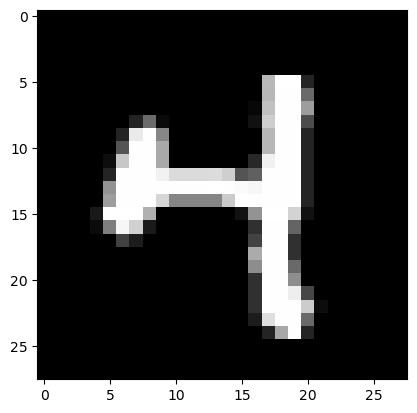

Prediction:  [4]


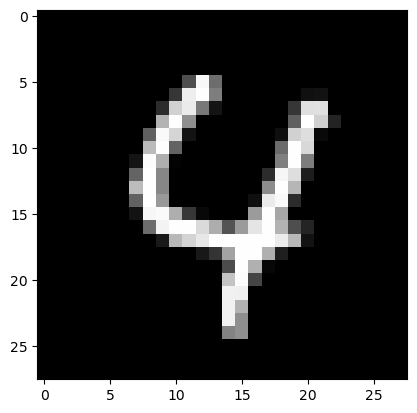

Prediction:  [1]


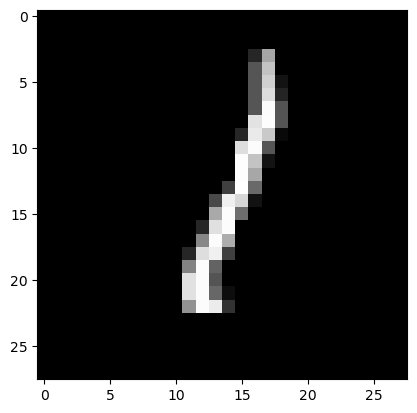

Prediction:  [0]


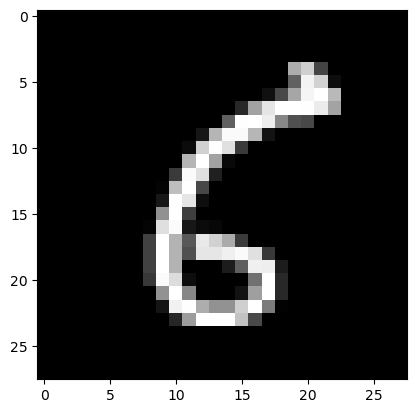

Prediction:  [5]


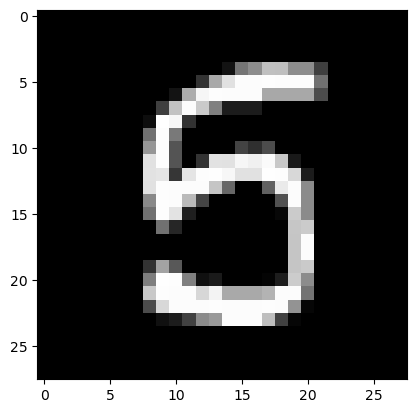

Prediction:  [0]


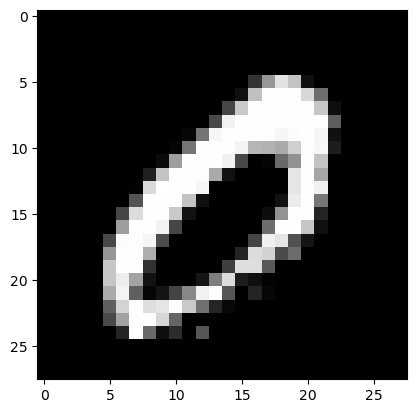

Prediction:  [8]


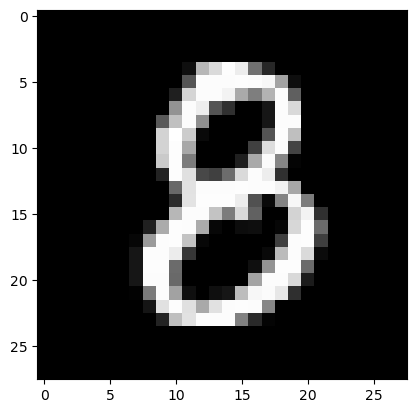

Prediction:  [7]


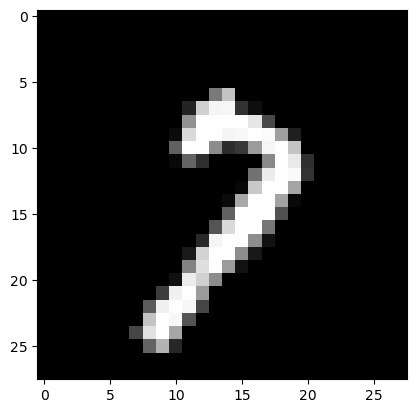

Prediction:  [3]


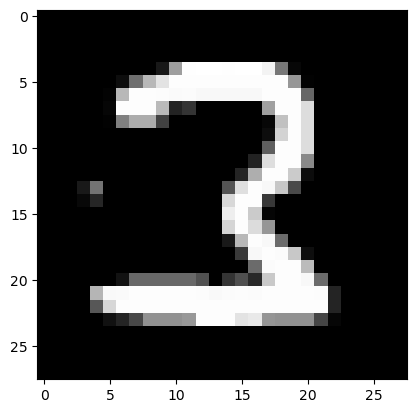

Prediction:  [4]


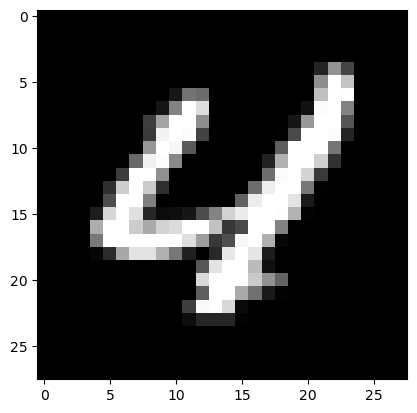

In [11]:
for i in range(10):
    test_prediction(np.random.randint(0,100) + i ,W1,b1,W2,b2)

In [12]:
dev_predictions = make_predictions(X_testD, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_testD)

[7 8 0 ... 7 4 0] [0 0 0 ... 0 0 0]


0.0995